In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
train_data = pd.read_csv('processed_data/train.csv', index_col=0)
dev_data = pd.read_csv('processed_data/dev.csv', index_col=0)

In [15]:
train_data.head()

,Source sentence,Answer sentence,Entity,Type
0,浙商银行企业信贷部叶老桂博士则从另一个角度对五道门槛进行了解读。叶老桂认为，对目前国内商业银...,叶老桂是一个人名实体。,叶老桂,name
1,浙商银行企业信贷部叶老桂博士则从另一个角度对五道门槛进行了解读。叶老桂认为，对目前国内商业银...,浙商银行是一个公司实体。,浙商银行,company
2,生生不息CSOL生化狂潮让你填弹狂扫,CSOL是一个游戏实体。,CSOL,game
3,那不勒斯vs锡耶纳以及桑普vs热那亚之上呢？,那不勒斯是一个组织机构实体。,那不勒斯,organization
4,那不勒斯vs锡耶纳以及桑普vs热那亚之上呢？,锡耶纳是一个组织机构实体。,锡耶纳,organization


In [16]:
dev_data.head()

,Source sentence,Answer sentence,Entity,Type
0,彭小军认为，国内银行现在走的是台湾的发卡模式，先通过跑马圈地再在圈的地里面选择客户，,台湾是一个地址实体。,台湾,address
1,彭小军认为，国内银行现在走的是台湾的发卡模式，先通过跑马圈地再在圈的地里面选择客户，,彭小军是一个人名实体。,彭小军,name
2,温格的球队终于又踢了一场经典的比赛，2比1战胜曼联之后枪手仍然留在了夺冠集团之内，,曼联是一个组织机构实体。,曼联,organization
3,温格的球队终于又踢了一场经典的比赛，2比1战胜曼联之后枪手仍然留在了夺冠集团之内，,温格是一个人名实体。,温格,name
4,突袭黑暗雅典娜》中Riddick发现之前抓住他的赏金猎人Johns，,突袭黑暗雅典娜》是一个游戏实体。,突袭黑暗雅典娜》,game


In [21]:
train_data['entity_len'] = train_data['Entity'].apply(lambda x: len(x))
dev_data['entity_len'] = dev_data['Entity'].apply(lambda x: len(x))
train_data['sentence_len'] = train_data['Source sentence'].apply(lambda x: len(x))
dev_data['sentence_len'] = dev_data['Source sentence'].apply(lambda x: len(x))

In [22]:
train_data.describe()

,entity_len,sentence_len
count,23338.000000,23338.000000
mean,4.513026,38.688062
std,3.210532,10.085386
min,1.000000,2.000000
25%,2.000000,35.000000
50%,4.000000,42.000000
75%,5.000000,46.000000
max,44.000000,50.000000


In [23]:
dev_data.describe()

,entity_len,sentence_len
count,2982.000000,2982.000000
mean,4.435949,38.812207
std,3.089043,9.952029
min,2.000000,2.000000
25%,2.000000,35.000000
50%,4.000000,42.000000
75%,5.000000,46.000000
max,36.000000,50.000000


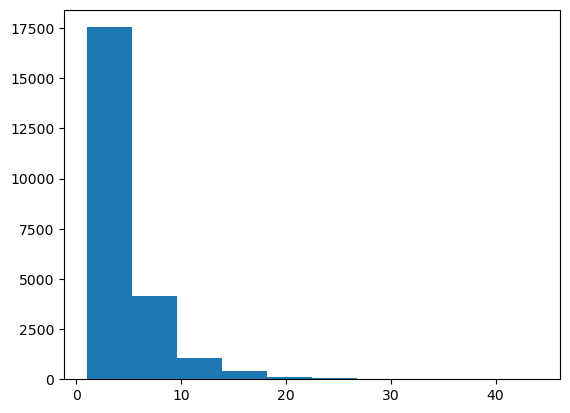

In [28]:
plt.hist(train_data['entity_len'])
plt.show()

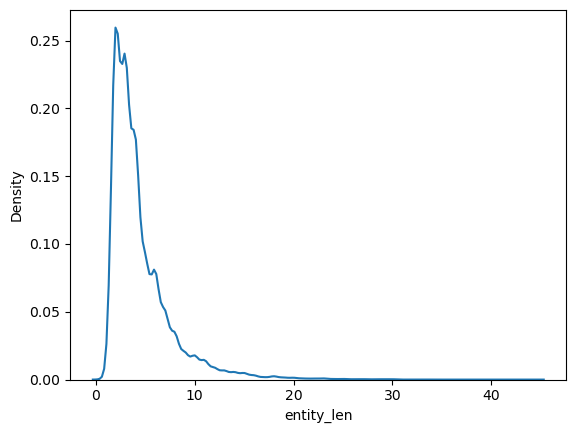

In [31]:
sns.kdeplot(train_data['entity_len'])
plt.show()

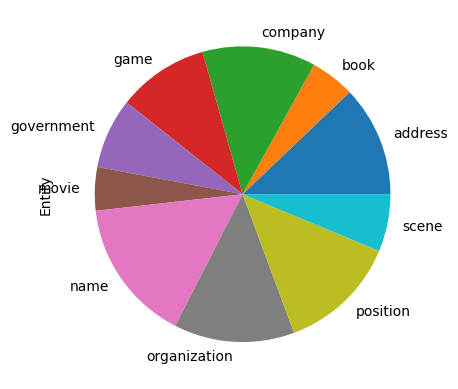

In [42]:
type_count = train_data.groupby('Type')['Entity'].count()
type_count.plot(kind='pie')
plt.show()

In [45]:
# 采样负样本后
train_data = pd.read_csv('processed_data/train.csv', index_col=0)
dev_data = pd.read_csv('processed_data/dev.csv', index_col=0)

In [44]:
train_data

,Source sentence,Answer sentence,Entity,Type
0,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,于故宫的乌鸦，@不是一个实体。,于故宫的乌鸦，@,non
1,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,华or浮躁社不是一个实体。,华or浮躁社,non
2,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,故宫是一个景点实体。,故宫,scene
3,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,个繁华or浮不是一个实体。,个繁华or浮,non
4,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,r浮躁社会里面不是一个实体。,r浮躁社会里面,non
...,...,...,...,...
58340,，江都(今扬州西南23公里，东汉末圮于长江)建县，隶属于江都国。“江都”之名，始见于史。,江)建县，隶属不是一个实体。,江)建县，隶属,non
58341,，江都(今扬州西南23公里，东汉末圮于长江)建县，隶属于江都国。“江都”之名，始见于史。,江都(今扬州西南23公里，东汉末圮于长江)建县是一个地址实体。,江都(今扬州西南23公里，东汉末圮于长江)建县,address
58342,，这款游戏已多次占领销量榜第一名，已经把暴雪MMORPG游戏《魔兽世界：巫妖王之怒》,《魔兽世界：巫妖王之怒》是一个游戏实体。,《魔兽世界：巫妖王之怒》,game
58343,，这款游戏已多次占领销量榜第一名，已经把暴雪MMORPG游戏《魔兽世界：巫妖王之怒》,暴雪是一个公司实体。,暴雪,company


In [46]:
train_data

,Source sentence,Answer sentence,Entity,Type
0,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,于故宫的乌鸦，@不是一个实体。,于故宫的乌鸦，@,non
1,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,华or浮躁社不是一个实体。,华or浮躁社,non
2,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,故宫是一个景点实体。,故宫,scene
3,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,个繁华or浮不是一个实体。,个繁华or浮,non
4,#大v小说#针对于故宫的乌鸦，@真牛叉觉得她们是这个繁华or浮躁社会里面人类的最好朋友，,r浮躁社会里面不是一个实体。,r浮躁社会里面,non
...,...,...,...,...
58340,，江都(今扬州西南23公里，东汉末圮于长江)建县，隶属于江都国。“江都”之名，始见于史。,江)建县，隶属不是一个实体。,江)建县，隶属,non
58341,，江都(今扬州西南23公里，东汉末圮于长江)建县，隶属于江都国。“江都”之名，始见于史。,江都(今扬州西南23公里，东汉末圮于长江)建县是一个地址实体。,江都(今扬州西南23公里，东汉末圮于长江)建县,address
58342,，这款游戏已多次占领销量榜第一名，已经把暴雪MMORPG游戏《魔兽世界：巫妖王之怒》,《魔兽世界：巫妖王之怒》是一个游戏实体。,《魔兽世界：巫妖王之怒》,game
58343,，这款游戏已多次占领销量榜第一名，已经把暴雪MMORPG游戏《魔兽世界：巫妖王之怒》,暴雪是一个公司实体。,暴雪,company
